<img src="moptop1.jpg" width="500" align='center'>

# An example to calculate Stokes q and u from MOPTOP data

### More context and detail could be found in [Shrestha et al. 2020](https://arxiv.org/abs/2004.07595)

16 different rotor positions are presented in Figure below:



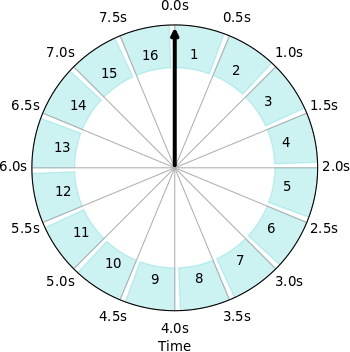

### Sensitivity calculation
First we need to make sure that two different cameras have the same effictive sensitivity. 
Let m and n be observed counts from camera 1 and camera 2 respectively. Here we have m[i] and n[i] where i represent the corresponding rotor positions going from 1 to 16 that have been observed by MOPTOP (shaded regions in figure above). Equation 16 in Shrestha et al. 2020 gives the way to calculate sensitivity (ratio of counts between camera 1 and camera 2) as show in Equation:

\begin{equation}
    F =\sqrt{\frac{n_1 n_3}{m_1 m_3}}.
\end{equation}

In [1]:
import numpy as np
#An example data set:
m = [1203351.752191414, 1164897.1896720522, 1091709.5318398364, 1143141.0289011188, 1214128.0744437359, 1152939.209470679, 1099198.2882252492, 1158541.9415447428, 1230644.4145455786, 1168782.5025405227, 1107002.316715553, 1148153.700299727, 1211368.3927269657, 1154985.4020769345, 1097117.6347320208, 1153095.729251614]
m_err = [1482.6251573386182, 1459.4000163183812, 1412.9263308214001, 1445.0465554741904, 1489.2043660069503, 1451.929404475362, 1417.723555345715, 1454.7070939011794, 1499.258164671699, 1461.8068065296904, 1422.7408711691164, 1448.2027430062603, 1487.527268677773, 1453.1920887423569, 1416.3767751218893, 1451.293354110313]
n =[1139291.9713853754, 1195528.9243285353, 1252272.4298316464, 1211446.9159053932, 1152022.7196399702, 1186577.441343206, 1265768.781539284, 1221364.3087299755, 1157435.7583541344, 1200855.486941771, 1266093.7107044298, 1210586.4217915414, 1148455.4576132721, 1202029.467131602, 1262400.8651265996, 1208247.7591051422]
n_err =[1456.7297264374677, 1491.4506723287795, 1526.5891140980298, 1502.1016054264867, 1464.8307198896225, 1485.8992112103717, 1534.7633821219881, 1508.183555410493, 1468.2209158042638, 1494.7478341756441, 1534.9612688444222, 1501.514929371479, 1462.549824863078, 1495.4970386442658, 1532.736460383767, 1500.1029451793252]


This gives an example to compute the sensitivity factor for few cases (Here n[0] represents rotor position 1 since python index starts from 0.):

In [3]:
 
f_1q = np.sqrt((n[0]*n[2])/(m[0]*m[2]))
f_2q = np.sqrt((n[4]*n[6])/(m[4]*m[6]))

f_1u = np.sqrt((n[1]*n[3])/(m[1]*m[3]))
f_2u = np.sqrt((n[5]*n[7])/(m[5]*m[7]))

print(f_1q)

1.0421184374481478


### Corrected counts
Use the sensitivity factor to correct the counts for camera 2 and now we get corrected counts c and d for camera 1 and camera 2 respectively

In [4]:
c1 = m[0]
d1 = n[0]/f_1q
c2 = m[1]
d2 = n[1]/f_1u
c3 = m[2]
d3 = n[2]/f_1q
c4 = m[3]
d4 = n[3]/f_1u
c5 = m[4]
d5 = n[4]/f_2q
c6 = m[5]
d6 = n[5]/f_2u
c7 = m[6]
d7 = n[6]/f_2q
c8 = m[7]
d8 = n[7]/f_2u

### Calculated Stokes q and u
Corrected counts now can be used to calculate Stokes Q, U, and I.

In [5]:
Q1 = c1 - d1
U1 = c2 - d2
I1 = (c1+d1+c2+d2)/2
q1 = Q1/I1
u1 = U1/I1

Q2 =-(c3 - d3)
U2 = -(c4 - d4)
I2 = (c3+d3+c4+d4)/2
q2 = Q2/I2
u2 = U2/I2

#We take average of two consecutive Stokes q and u to get final Stokes q and Stokes u. Once you utilize all the 16 rotor position data, you get 4 Stokes_q and Stokes_u 
# which you can average as well.
stokes_q = (q1+q2)/2
stokes_u = (u1+u2)/2

print(stokes_q,stokes_u)

0.04780723663203403 0.008042477539403414


### Calculate Stokes q and u error
In order to calculate error in stokes_q and stokes_u, you need to get error in your counts from the photometry. Say m_err and n_err are error in counts from camera 1 and 2 respectively. Then we do error propagation in q and u to get q_err and u_err:



\begin{split}
    & dx1_q = \sqrt{n_{1e}^2+(((m_3/(2n_1n_3m_1))^2 \times(1/(n_1n_3m_1)^2)\times}\\  &\sqrt{((n_{1e}/n_1)^2+(n_{3e}/n_3)^2+(m_{1e}/m_1)^2))+(m_{3e}/m_3)^2)}.
    \end{split}
    

\begin{split}
    & dx1_u = \sqrt{n_{2e}^2+(((m_4/(2 n_2 n_4 m_2))^2 \times(1/(n_2 n_4 m_2)^2)\times}\\  &\sqrt{((n_{2e}/n_2)^2+(n_{4e}/n_4)^2+(m_{2e}/m_2)^2))+(m_{4e}/m_4)^2)}.
    \end{split}
    


\begin{equation}
 q_{err} =  q \times \left( \left (\frac {dx1_q}{f_1q \times m1 - n1}\right)^2 + \left(\frac{dx1_q}{f_1q \times m1 + n1}\right)^2 \right)
\end{equation}

\begin{equation}
 u_{err} =  u \times \left( \left (\frac {dx1_u}{f_1u \times m2 - n2}\right)^2 + \left(\frac{dx1_u}{f_1u \times m2 + n2}\right)^2 \right)
\end{equation}

In [19]:
#To simplify, first we seperate sensitivity factor part and do error propagation
dx1_q = np.sqrt(n_err[0]**2+(((m[2]/(2*n[0]*n[2]*m[0]))**2)*(1/(n[0]*n[2]*m[0])**2)*((n_err[0]/n[0])**2+(n_err[2]/n[2])**2+(m_err[0]/m[0])**2))+(m_err[2]/m[2])**2)
dx1_u = np.sqrt(n_err[1]**2+(((m[3]/(2*n[1]*n[3]*m[1]))**2)*(1/(n[1]*n[3]*m[1])**2)*((n_err[1]/n[1])**2+(n_err[3]/n[3])**2+(m_err[1]/m[1])**2))+(m_err[3]/m[3])**2)

#Then combine all the parts to get error in q and u.
q_err = np.abs(stokes_q*(np.sqrt((dx1_q/(f_1q*m[0]-n[0]))**2+(dx1_q/(f_1q*m[0]+n[0]))**2)))
u_err = np.abs(stokes_u*(np.sqrt((dx1_u/(f_1u*m[1]-n[1]))**2+(dx1_u/(f_1u*m[1]+n[1]))**2)))

print(q_err,u_err)

0.0006076376560299876 0.0006205304741685097
